In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import t

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Для дальшего визуализации пригодится ListedColormap

In [4]:
from matplotlib.colors import ListedColormap

#### Метод, принимает на вход данные и цвета, на выходе получаем рисунок

In [5]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8,8))
    pyplot.scatter (list(map(lambda x: x[0], data[0])),list(map(lambda x: x[1], data[0])), c=data[1], cmap=colors)

### Зададим набор данных

In [6]:
circles = datasets.make_circles(noise=0.0)

In [7]:
colors = ListedColormap(['red','yellow'])

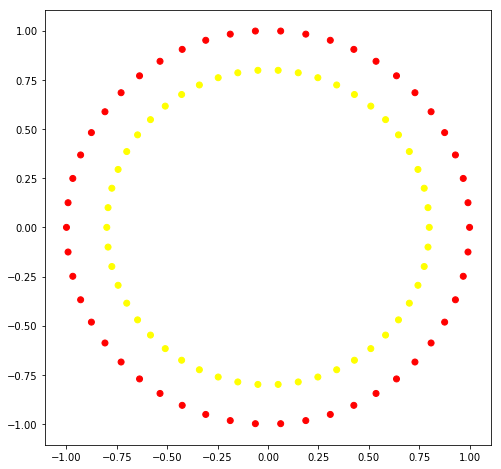

In [8]:
plot_2d_dataset(circles , colors)

### Добавим шума

In [9]:
noisy_circles = datasets.make_circles(noise=0.1)

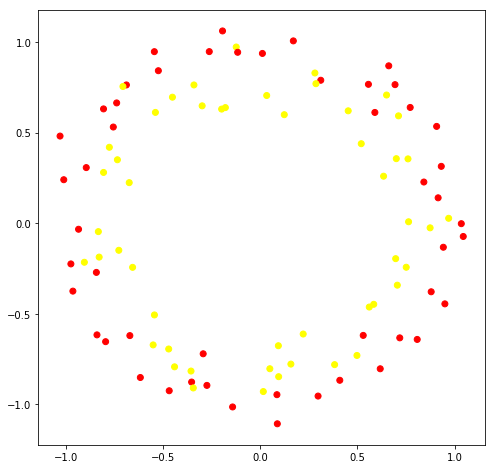

In [10]:
plot_2d_dataset(noisy_circles , colors)

### Решаем задачу $$x^2+y^2=r^2$$ $$x^2+y^2=R^2$$

#### Сначала посмотрим на признаки 

In [11]:
print("features: {}".format(noisy_circles[0][:10]))

features: [[-0.8389182  -0.61661842]
 [ 0.03345701  0.70549561]
 [-0.14181818 -1.01475393]
 [-0.6698998  -0.62063089]
 [-0.82771363 -0.1870584 ]
 [-0.72668761 -0.14943038]
 [-0.54399882  0.94775127]
 [ 0.12381403  0.59960965]
 [-0.75498837  0.53140119]
 [-0.26171939  0.94803695]]


#### предсказываем результат

In [12]:
print("target: {}".format(noisy_circles[1][:10]))

target: [0 1 0 0 1 1 0 1 0 0]


### Разбиение данных на обучение и тест

In [13]:
train_data, test_data, train_label, test_label = train_test_split(noisy_circles[0],noisy_circles[1], test_size=0.2, random_state=1 )

In [14]:
print("Размер обучающей выборки: {} объектов".format(len(train_data)))
print("Размер тестовой выборки: {} объектов".format(len(test_data)))

Размер обучающей выборки: 80 объектов
Размер тестовой выборки: 20 объектов


In [15]:
print("Обучающая выборка: ", train_data[::5])
print("Тестовая выборка",test_data[::5])

Обучающая выборка:  [[-0.14181818 -1.01475393]
 [-0.67322398  0.22418259]
 [ 0.69959909  0.35670243]
 [-0.34388151 -0.90987427]
 [-0.61601337 -0.85212818]
 [ 0.01142211  0.93789178]
 [ 0.40918042 -0.86748911]
 [ 0.80706177 -0.64181788]
 [ 0.31140349  0.78978742]
 [-0.73392462  0.35064429]
 [-0.65580114 -0.24361241]
 [ 0.0880968  -1.107752  ]
 [ 0.64959408  0.70815905]
 [ 0.09496783 -0.84758311]
 [ 0.03345701  0.70549561]
 [ 0.51942392  0.43931176]]
Тестовая выборка [[-0.17895041  0.63882949]
 [-0.90375958 -0.21557809]
 [-0.80508085  0.28057906]
 [ 0.90694899  0.53486794]]


In [16]:
print("Метки классов на обучающей выборке: ", train_label[::5])
print("Метки классов на тестовой выборке",test_label[::5])

Метки классов на обучающей выборке:  [0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1]
Метки классов на тестовой выборке [1 1 1 0]


In [17]:
r_train=list(map(lambda x: (x[0]**2+x[1]**2)**0.5, train_data))
r_test=list(map(lambda x: (x[0]**2+x[1]**2)**0.5, test_data))

In [18]:
r=np.array(r_train)[train_label==1]
R=np.array(r_train)[train_label==0]

In [19]:
R_mean=np.mean(R)
r_mean=np.mean(r)

In [20]:
R_mean

0.9920417963491204

In [21]:
r_mean

0.8111797609458574

### Построим доверительный интервал  для r и R при  $\gamma=0.95$

$$\overline{x}-\frac{s}{\sqrt{n}} t_{\gamma}(n-1)\leq a \leq\overline{x}+\frac{s}{\sqrt{n}} t_{\gamma}(n-1)$$

In [22]:
s_r=(np.var(r)*(len(r))/len(r-1))**0.5
s_R=(np.var(R)*(len(R))/len(R-1))**0.5
print("Испраленная выборояная дисперсия для r: {} ".format(s_r))
print("Испраленная выборояная дисперсия для R: {} ".format(s_R))

Испраленная выборояная дисперсия для r: 0.09764061560613864 
Испраленная выборояная дисперсия для R: 0.062401686560498534 


In [23]:
#0.0000069310573
alpha=0.0005
gamma=1-alpha/2
t_r=t.ppf(gamma, len(r)-1)
t_R=t.ppf(gamma, len(R)-1)
print("Квантиль распределения Стьюдента с {} степенями свободы равна {} для r." .format(len(r-1),t_r))
print("Квантиль распределения Стьюдента с {} степенями свободы равна {} для R." .format(len(R-1),t_R))

Квантиль распределения Стьюдента с 42 степенями свободы равна 3.780340225396802 для r.
Квантиль распределения Стьюдента с 38 степенями свободы равна 3.815427181361007 для R.


In [24]:
sigma_r=(s_r/(len(r)**0.5))*t_r
sigma_R=s_R/(len(R)**0.5)*t_R
r_left=r_mean-sigma_r
r_right=r_mean+sigma_r
R_left=R_mean-sigma_R
R_right=R_mean+sigma_R
print("Доверительный интервал ({},{}) для r.".format(r_left,r_right))
print("Доверительный интервал ({},{}) для R.".format(R_left,R_right))

Доверительный интервал (0.7542241189929131,0.8681354028988018) для r.
Доверительный интервал (0.9534186456407117,1.030664947057529) для R.


In [49]:
def Circle(r, color,label):
    x1=np.linspace(-r,r,100)
    y1=(r**2-x1**2)**0.5
    x2=np.linspace(r,-r,100)
    y2=-(r**2-x2**2)**0.5
    x=np.concatenate((x1,x2))
    y=np.concatenate((y1,y2))
    plt.plot(x, y, color, label=label)
    plt.legend(bbox_to_anchor=(1, 1))

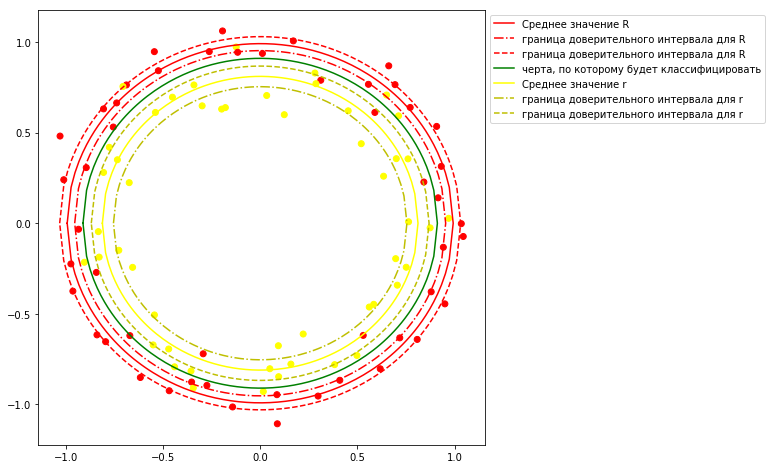

In [51]:
res=(R_left+r_right)/2
plot_2d_dataset(noisy_circles , colors)
Circle(R_mean,'red',"Среднее значение R")
Circle(R_left,'r-.',"граница доверительного интервала для R")
Circle(R_right,'r--',"граница доверительного интервала для R")
Circle(res,'g',"черта, по которому будет классифицировать")
Circle(r_mean,'yellow',"Среднее значение r")
Circle(r_left,'y-.',"граница доверительного интервала для r")
Circle(r_right,'y--',"граница доверительного интервала для r")


Нужно построить модель, которая принимает на вход x и y, на выходе определяет класс 

In [28]:
mask=np.array(r_test)<res
a=np.zeros(len(mask))
a[mask]=1
a

array([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1.])

In [29]:
test_label

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [30]:
a-test_label

array([ 0.,  0.,  0.,  1.,  1., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.])